<a href="https://colab.research.google.com/github/affanahmad528/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Team_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Let's try to answer the following questions

1:What will the overview of arrival period?

2:From which country most guests come?

3:Which room type is most booked?

4:Find the Distribution channel with high cancelation_percentage(%)?

5:Which meal type is most preffered meal of customers?

6:Obtain the number of Adults reserving , and the number of Families with children reserving

7:What is percentage of bookings in each hotel?

8: Which agent makes most no. of bookings?

9:What is the percentage of the repeated customers?

10:What is preferred stay length in each hotel?

11: Which hotel has high chance that its customer will return for another stay?

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the data from the dataset 
file_path='/content/drive/MyDrive/Share Hotel Bookings.csv'
df_hotel_booking=pd.read_csv(file_path)


In [ ]:
#Looking at the data
df_hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df_hotel_booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Now lets describe the variables**

## **Variable Description**

**hotel**: Hotel Type

**is_canceled**: Value indicating if the booking was canceled

**lead_time**: Number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel

**arrival_date_year**: Year of arrival date

**arrival_date_month**: Month of arrival date with 12 categories “January” to “December”

**arrival_date_week_number**: Week number of the arrival date

**arrival_date_day_of_month**: Day of the month of the arrival date 

**stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults**: Number of adults

**children**: Number of children

**Babies**: Number of babies

**meal:** Type of meal booked. Categories are presented in standard hospitality meal packages

Undefined/SC – no meal package

BB – Bed & Breakfast

HB – Half board (breakfast and one other meal – usually dinner)

FB – Full board (breakfast, lunch and dinner)

**country**: Country of origin.

**market_segment**: Market segment designation

**distribution_channel**: Booking distribution channel

**is_repeated_guest**: Value indicating if the booking name was from a repeated guest

**previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type**: Code of room type reserved

**assigned_room_type**: Code for the type of room assigned to the booking

**booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories

No Deposit – no deposit was made

Non Refund – a deposit was made in the value of the total stay

Refundable – a deposit was made with a value under the total cost of stay

**agent**: ID of the travel agency that made the booking

**company**: ID of the company/entity that made the booking or responsible for paying the booking

**days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type**: Type of booking, assuming one of four categories (Contract,Group,Transient,Transient-party)

Contract - when the booking has an allotment or other type of contract associated to it Group – when the booking is associated to a group

Transient – when the booking is not part of a group or contract, and is not associated to other transient booking

Transient-party – when the booking is transient, but is associated to at least other transient booking

**adr**: Average Daily Rate

**required_car_parking_spaces**: Number of car parking spaces required by the customer

**total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status**: Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer

Check-Out – customer has checked in but already departed

No-Show – customer did not check-in and did inform the hotel of the reason why

**reservation_status_date**: Date at which the last status was set

In [ ]:
#gathering_information
df_hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Copying the dataset
df_booking=df_hotel_booking.copy()

# **Data Cleaning**

Cleaning data is neccessary to remove certain ambigous data before entering the EDA,because these data can effect the outome of the EDA

While cleaning data we will perform following steps:

**Step 1**:**Removing duplicate elements if any**

In [ ]:
#Showing no.of duplicate rows
df_booking[df_booking.duplicated()].shape

(31994, 32)

In [ ]:
#Droping duplicate values
df_booking.drop_duplicates(inplace=True)

In [ ]:
#checking shape after droping duplicate values
df_booking.shape

(119390, 32)

**Step 2:Handling missing values**

In [ ]:
## Find the missing value, show the total null values for each column and sort it in descending order
df_booking.isnull().sum().sort_values(ascending=False)[:]


company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows

In [ ]:
# Drop Rows where there is no adult, baby and child
df_book = df_booking.drop(df_booking[(df_booking.adults+df_booking.babies+df_booking.children)==0].index)

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel throught any agent or via any company. So in that case values can be null under these columns. We will replace null values by 0 in these columns

In [ ]:
# If no id of agent or company is null, just replace it with 0
df_booking[['agent','company']] = df_booking[['agent','company']].fillna(0.0)

## For the missing values in the country column, replace it with mode (value that appears most often)
df_booking['country'].fillna(df_hotel_booking.country.mode().to_string(), inplace=True)

**Step 3: Converting columns to appropriate datatypes**

In [ ]:
## for missing children value, replace it with rounded mean value
df_booking['children'].fillna(round(df_hotel_booking.children.mean()), inplace=True)
# changing datatype of column 'reservation_status_date' to data_type.
df_booking['reservation_status_date'] = pd.to_datetime(df_booking['reservation_status_date'], format = '%Y-%m-%d')
## convert datatype of these columns from float to integer
df_booking[['children', 'company', 'agent']] = df_booking[['children', 'company', 'agent']].astype('int64')

## **Step 4: Adding important columns**

In [ ]:
# Adding total staying days in hotels
df_booking['total_stay'] = df_booking['stays_in_weekend_nights']+df_booking['stays_in_week_nights']

In [ ]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
df_booking['total_people'] = df_booking['adults']+df_booking['children']+df_booking['babies']

# **Exploratory Data Analysis(EDA)**

Let's try to extract the informattion from our data and solve the following questions

## **1. What will the overview of arrival period?**

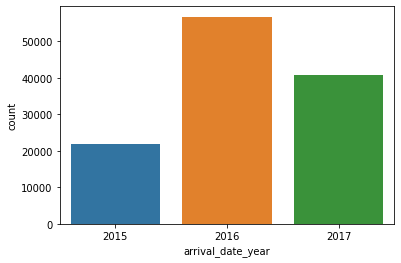

In [ ]:
arrival_data = [ 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = df_booking[arrival_data]
sns.countplot(data = period_arrival, x = 'arrival_date_year')

The arrival of peoples in 2016 is double compared to 2015 but has gradually decreased in 2017

Now let's show the graphical representation of arrival of peoples according to month and per day

Text(0, 0.5, 'Count')

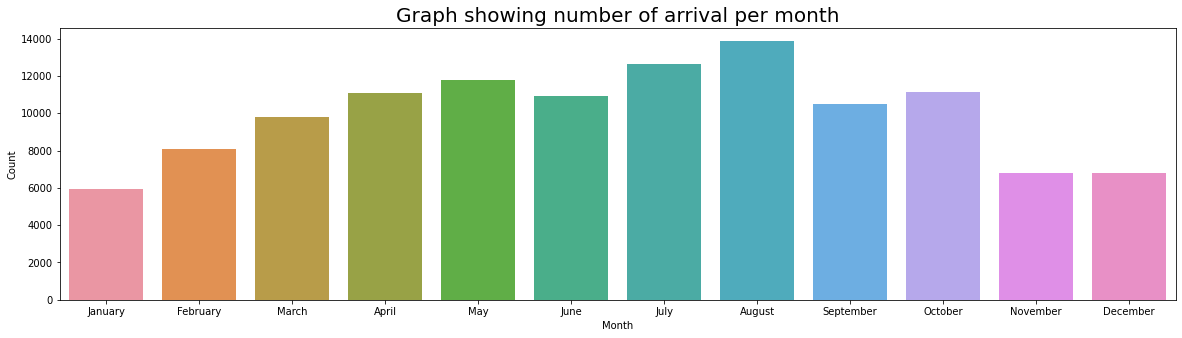

In [ ]:
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

Here we can see that the Augest month has the maximum no.of peoples arrived and January has the least peples arrived

Text(0.5, 1.0, 'Graph showing number of arrival per day')

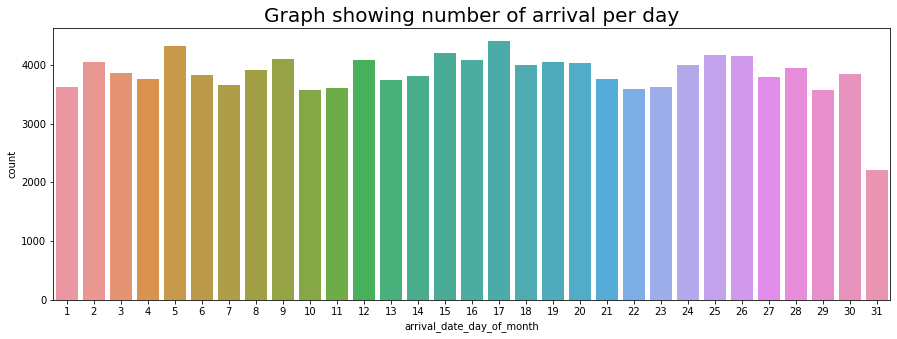

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', ).set_title('Graph showing number of arrival per day', fontsize = 20)

As shown in the graph the second day is having maximum arrival and 31st as the least



## **2:From which country most guests come?**



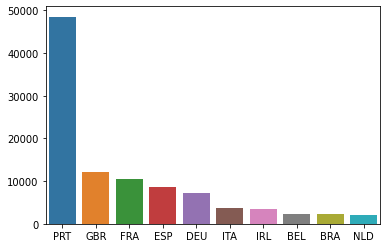

In [ ]:
sns.barplot (y= list(df_book.country.value_counts().head (10)), x= list(df_book.country.value_counts().head(10).index))

Portugal, United kingdom ,France, Spain and Germany are the top countries from most guests come,from which portugal has the highest number of peoples.More than 80% come from Portugal, United kingdom ,France, Spain and Germany.

## **3:Which room type is most booked?**

Text(0.5, 1.0, 'Most preferred Room type')

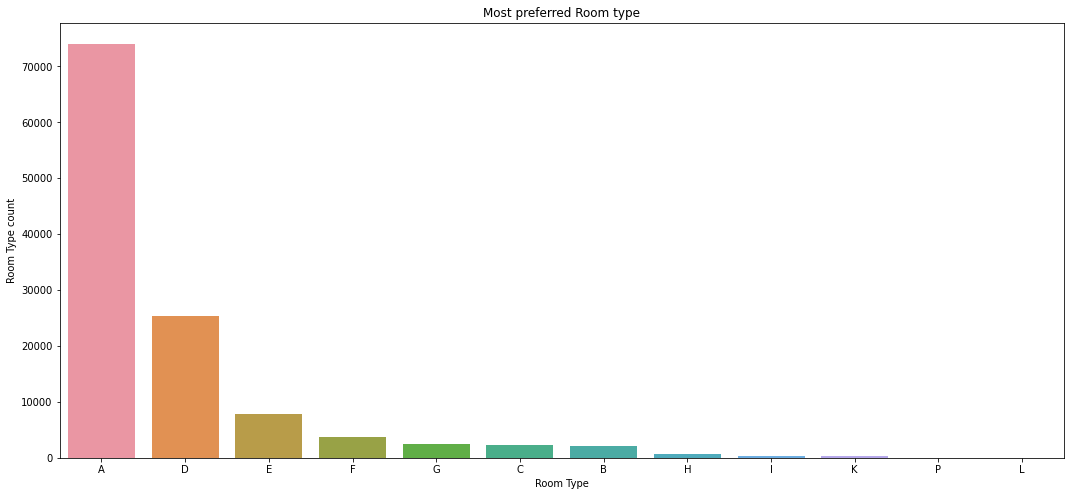

In [ ]:
#set plotsize
plt.figure(figsize=(18,8))
#plotting 
sns.countplot(x=df_booking['assigned_room_type'],order=df_booking['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Room Type count')
#set title for the plot
plt.title("Most preferred Room type")

'A' type room is preferred by majority of people which booking rooms

## **4:Find the Distribution channel with high cancelation_percentage(%)?**

Text(0.5, 1.0, 'Cancellation Rate across Distribution channels')

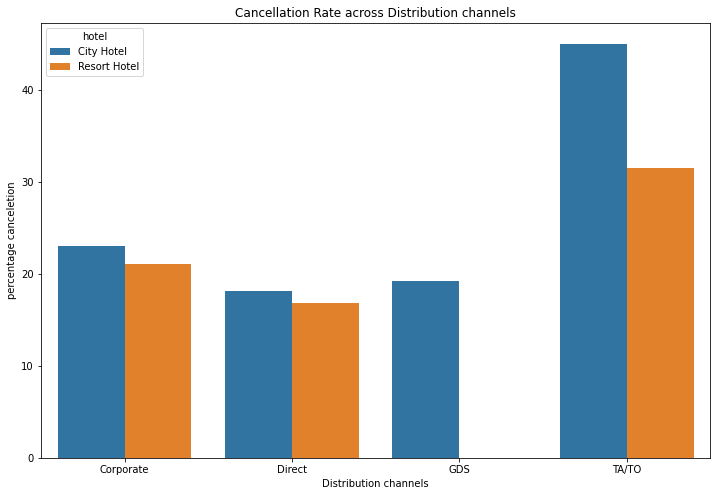

In [ ]:
# 1= canceled
 # 0 = not canceled
canceled_booking=df_booking[df_booking['is_canceled']==1]

#groupby distribution channel and hotel 
# droping undefined as its has only 4 values and we cant predict much about that data
canceled_booking=canceled_booking.groupby(['distribution_channel','hotel']).size().drop(index = 'Undefined').reset_index().rename(columns={0:'Counts'})
# adding 'total booking column for calculating the percentage.
canceled_booking['total_bookings']=df_booking.groupby(['distribution_channel','hotel']).size().drop(index = 'Undefined').reset_index().rename(columns={0:"total_bookings"}).drop(['distribution_channel','hotel'],axis=1)
canceled_booking
#set plot size and plot barchart (visualization)
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y=canceled_booking['Counts']*100/canceled_booking['total_bookings'],hue="hotel",data=canceled_booking)

# set labels
plt.xlabel('Distribution channels')
plt.ylabel('percentage canceletion')
plt.title('Cancellation Rate across Distribution channels')

TA/TO has the highest cancellation percentage.In city hotel it is 35% and in resort hotel it is 28%

## **5:Which meal type is most preffered meal of customers?**


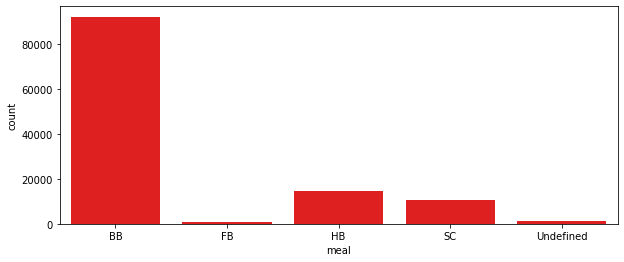

In [ ]:
import seaborn as sns
#sns.set(style="dark")

plt.figure( figsize=(10, 4))

sns.countplot(x = 'meal', data=df_booking, color= 'red' )
plt.show()

From this question we can take a result that most common type of meal is BB and Least common is undefined.



## **6:Obtain the number of Adults reserving , and the number of Families with children reserving**

Text(0, 0.5, 'Reservation count')

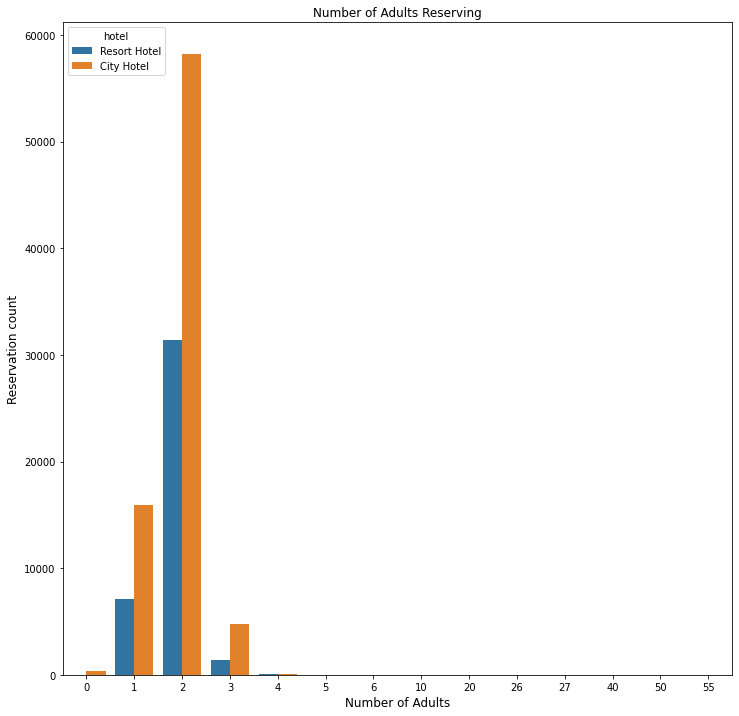

In [ ]:
plt.figure( figsize=(12, 12))
#c =['blue',"red"]
graph = sns.countplot(x="adults",hue='hotel',  data =df_booking)  
#sns.sexlat_style("dark")
graph.set(title="Number of Adults Reserving")
graph.set_xlabel("Number of Adults", fontsize=12)
graph.set_ylabel("Reservation count", fontsize=12)

Text(0, 0.5, 'Reservation count')

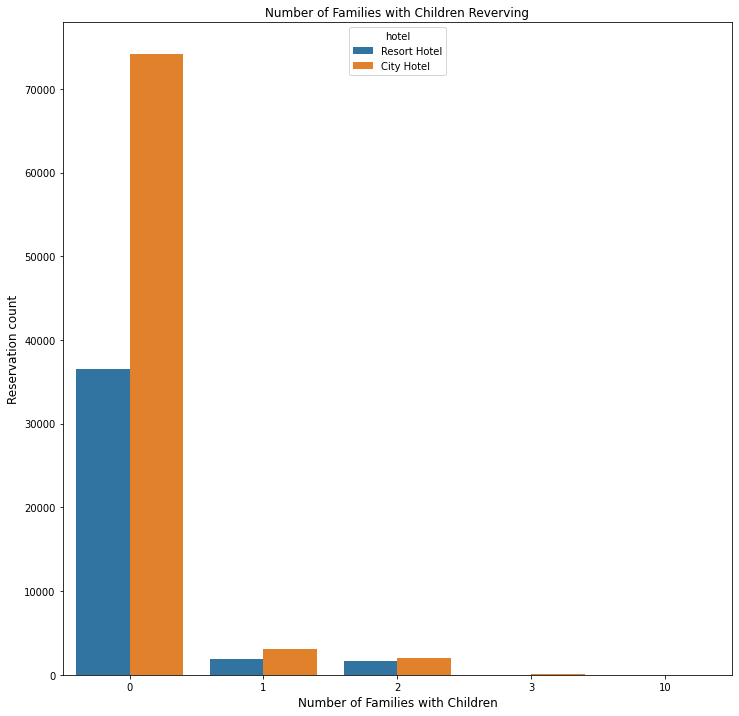

In [ ]:
plt.figure( figsize=(12, 12))
#c =['blue',"red"]
graph = sns.countplot(x="children", hue= 'hotel', data =df_booking)  
graph.set(title="Number of Families with Children Reverving")
graph.set_xlabel("Number of Families with Children", fontsize=12)
graph.set_ylabel("Reservation count", fontsize=12)

From above two graph,in the first graph the adult with pair has most reservations and in the second graph adults with zero children is having most booking,so we can conclude that the adults without children has more booking

## **7:What is percentage of bookings in each hotel?**

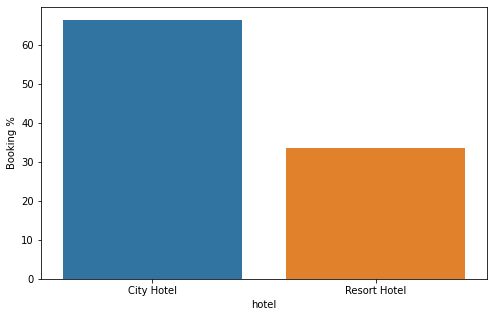

In [ ]:
grouped_by_hotel = df_booking.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df_booking.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

The percentage of booking of City hotel is 60% and the percentage in Resort hotel comes down to 36% 

## **8: Which agent makes most no. of bookings??**

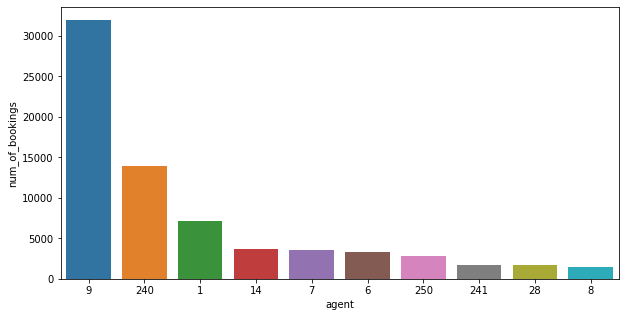

In [ ]:
d1 = pd.DataFrame(df_booking['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

Agent '9.0' has the most no.of booking above 30000 bookings and  agent' 8.0' with least no.of bookings

## **9:What is the percentage of the repeated customers?**

In [ ]:
#Showing the  percentage of repeated customers 
repeated_cust = df_book.groupby('is_repeated_guest')
df1 = pd.DataFrame(round((repeated_cust.size()/df_book.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
labels = 'new guests','repeated guest'
df1

,is_repeated_guest,Booking_%
0,0,96.85
1,1,3.15


3.86 is the the booking percentage of repeated guests and the percentage of new guests is 96.14

Text(0.5, 1.0, 'Percentage of reapeated guests')

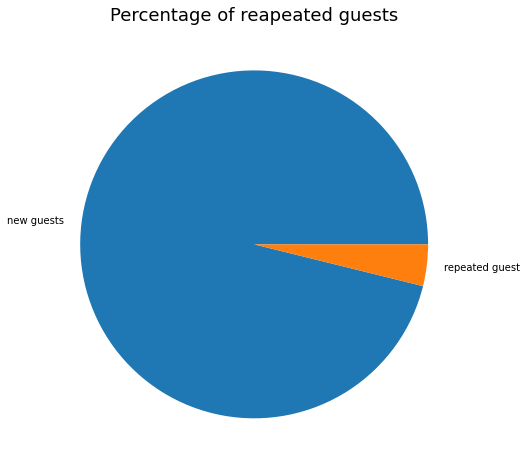

In [ ]:
#Showing the pie plot
plt.figure(figsize=(8,8))
plt.pie(df1['Booking_%'],labels=labels)
plt.title('Percentage of reapeated guests',fontsize =18)

## **10:What is preferred stay length in each hotel?**

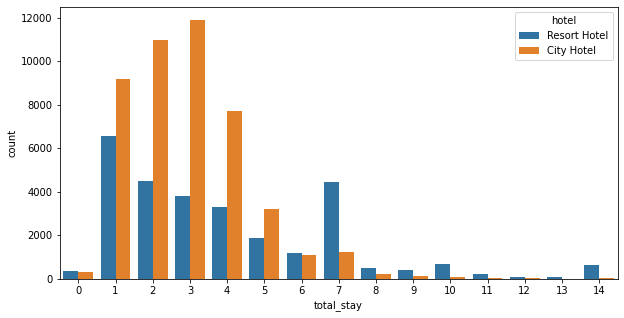

In [ ]:
not_canceled = df_booking[df_booking['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.



## **11: Which hotel has high chance that its customer will return for another stay?**

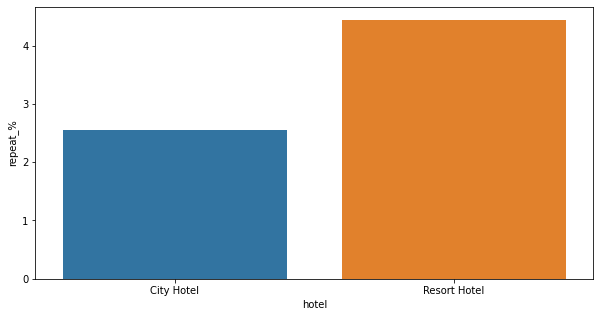

In [ ]:
# Selecting and counting repeated customers bookings
repeated_data = df_booking[df_booking['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

### Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

# **Conclusion**

We used the dataset that contains data about hotel bookings

We cleaned the data and then we performed the exploratory data analysis to extract information from the data to answer the following questions.

1:What will the overview of arrival period?

2:From which country most guests come?

3:Which room type is most booked?

4:Find the Distribution channel with high cancelation_percentage(%)?

5:Which meal type is most preffered meal of customers?

6:Obtain the number of Adults reserving , and the number of Families with children reserving

7:What is percentage of bookings in each hotel?

8: Which agent makes most no. of bookings?

9:What is the percentage of the repeated customers?

10:What is preferred stay length in each hotel?

11: Which hotel has high chance that its customer will return for another stay?

**We learned that**

1:The arrival of peoples in 2016 is double compared to 2015 but has gradually decreased in 2017and in the monthly arrival we can see that the Augest month has the maximum no.of peoples arrived and January has the least peples arrived.As shown in the graph the second day is having maximum arrival and 31st as the least.

2:Portugal, United kingdom ,France, Spain and Germany are the top countries from most guests come,from which portugal has the highest number of peoples.More than 80% come from Portugal, United kingdom ,France, Spain and Germany.

3:'A' type room is preferred by majority of people which booking rooms

4:TA/TO has the highest cancellation percentage.In city hotel it is 35% and in resort hotel it is 28%

5:From this question we can take a result that most common type of meal is BB and Least common is undefined.

6:From above two graph,in the first graph the adult with pair has most reservations and in the second graph adults with zero children is having most booking,so we can conclude that the adults without children has more booking



7:The percentage of booking of City hotel is 60% and the percentage in Resort hotel comes down to 36%.

8:Agent '9.0' has the most no.of booking above 30000 bookings and agent' 8.0' with least no.of bookings.

9:3.86 is the the booking percentage of repeated guests and the percentage of new guests is 96.14

10:Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

11:Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.



